# Problem Set 2

## Python Questions

### 1. What value is displayed when the last expression (a) is evaluated? Explain your answer by indicating what happens in every executed statement.

In [1]:
a = 0
def b():
    global a
    a = c(a)
    
def c(a):
    return a + 2
 

In [2]:
b()

In [3]:
b()

In [4]:
b()

In [5]:
a

6

* Value of a is 6 after b() is called for three times.
* Intially the values of global variable a is 0 when b() is called for the first time a = 0 next when a=c(a) is executing it calls c(a) function so the value will be a + 2 => 0+2 = 2  i.e, a = 2. When b() is called for second time the function c(a) will be called which returns a + 2 i.e, a = 2 + 2 = 4. Now the global value a = 4. 
* When b() is called for the third time the value of a is 4, when the a = c(a) is executing it calls c(a) function which returns a + 2 i.e, 4 + 2 = 6. Therefore the value 6 is assigned to a.
* Now if we print a the value 6 will be printed.

### 2. Function fileLength(), given to you, takes the name of a file as input and returns the length of the file. If the file cannot be found by the interpreter or if it cannot be read as a text file, an exception will be raised. Modify function fileLength() so that a friendly message is printed.

In [6]:
import os

def fileLength(filename):
    
    try:
        infile = open(filename)
        content = infile.read()
        total_length = len(content)
        print("Length of the file is: ", total_length)
        infile.close()
        
    
    except:
        print("File {}".format(filename), "not found")
        

fileLength(r"D:\Bhavya\Academics\BDAT\Data Programming\New.py")
#fileLength("Sample.txt")

Length of the file is:  426


### 3 Write a class name called Marsupai. Now write a class named Kangaroo as a subclass of Marsupial that inherits all the attributes of Marsupial and also:
* extends the Marsupial __init__ constructor to take, as input, the coordinates x and y of the Kangaroo object,
* supports method jump that takes number values dx and dy as input and moves the kangaroo by dx units along the x-axis and by dy units along the y-axis, and
* overloads the __str__ operator so it behaves as shown below.

In [7]:
class Marsupial:

    def __init__(self):
        self.lst = []
        
    def put_in_pouch(self, item):
        self.lst.append(item)
        
    def pouch_contents(self):
        return self.lst

In [8]:
class Kangaroo(Marsupial):
    
    def __init__(self, xcoord, ycoord):
        Marsupial.__init__(self)
        'initialize coordinates to (xcoord, ycoord)'
        self.x = xcoord
        self.y = ycoord
        
    def jump(self, dx, dy):
        'change the x and y coordinates by dx and dy'
        self.x += dx
        self.y += dy 
        
    def __str__(self):
        
        return " I am a Kangaroo located at coordinates ("+str(self.x)+","+str(self.y)+")"

In [9]:
k = Kangaroo(0,0)
print(k)

k.put_in_pouch("Doll")
k.put_in_pouch("Firetruck")
k.put_in_pouch("Kitten")
print(k.pouch_contents())

k.jump(1,0)
k.jump(1,0)
k.jump(1,0)
print(k)

 I am a Kangaroo located at coordinates (0,0)
['Doll', 'Firetruck', 'Kitten']
 I am a Kangaroo located at coordinates (3,0)


### 4. Collatz function

In [10]:
def collatz(n):
    
    if (n < 1):
        print("Please enter postivie integers only")
    
    else:
        
        if n == 1:
            print(n)
            
        elif ((n % 2) == 0):
            print(n)
            collatz(n // 2)
            
        elif ((n % 2) == 1):
            print(n)
            collatz(3*n+1)
            

collatz(10)

10
5
16
8
4
2
1


### 5 Write a recursive method binary() that takes a non-negative integer n and prints the binary representation of integer n.

In [11]:
def binary(n):
    
    if n == 0:
        print(0)
    
    else:
        if n == 1:
            print(1)
            
        elif n > 1:
            
            binary(n // 2)
            print( n % 2)
            
binary(5)

1
0
1


### Question 6 : Implement a class named HeadingParser that can be used to parse an HTML document, and retrieve and print all the headings in the document. You should implement your class as a subclass of HTMLParser, defined in Standard Library module html.parser. When fed a string containing HTML code, your class should print the headings, one per line and in the order in which they appear in the document. Each heading should be indented as follows: an h1 heading should have indentation 0, and h2 heading should have indentation 1, etc. Test your implementation using w3c.html.

In [12]:
from html.parser import HTMLParser
class HeadingParser(HTMLParser):
    
    def __init__(self):
        
        HTMLParser.__init__(self)
        self.inHeading = False
        self.indentvar = 0    

    def handle_starttag(self, tag, attrs):
        if tag == 'h1' and 'h2':
            self.inHeading=True
            self.indentvar=0
            self.indentvar = 1

    def handle_endtag(self, tag):
        if tag == 'h1' and 'h2':
            self.inHeading=False
            
    def handle_data(self,data):
        if (self.inHeading and self.indentvar ==0):   
            print(data)
        elif (self.inHeading and self.indentvar ==1):
            print(' ',data) 

In [13]:
infile = open('D:\Bhavya\Academics\BDAT\Data Programming\w3c.txt')
content = infile.read()
infile.close()
hp = HeadingParser()
hp.feed(content)

  W3C Mission


### 7. Implement recursive function webdir() that takes as input: a URL (as a string) and non-negative integers depth and indent. Your function should visit every web page reachable from the starting URL web page in depth clicks or less, and print each web page's URL. As shown below, indentation, specified by indent, should be used to indicate the depth of a URL

In [14]:
from urllib.parse import urljoin
from urllib.request import urlopen
from html.parser import HTMLParser

class Collector(HTMLParser):
    'collects hyperlink URLs into a list'

    def __init__(self, url):
        'initializes parser, the url, and a list'
        HTMLParser.__init__(self)
        self.url = url
        self.links = []

    
    def handle_starttag(self, tag, attrs):
        'collects hyperlink URLs in their absolute format'
        if tag == 'a':
            for attr in attrs:
                if attr[0] == 'href':
                    # construct absolute URL
                    absolute = urljoin(self.url, attr[1])
                    if absolute[:4] == 'http': # collect HTTP URLs
                        self.links.append(absolute)
                        
    def getLinks(self):
        'returns hyperlinks URLs in their absolute format'
        return self.links


In [15]:
url = 'http://reed.cs.depaul.edu/lperkovic/test1.html'
resource = urlopen(url)
content = resource.read().decode()
collector = Collector(url)
collector.feed(content)
collector.getLinks()

['http://reed.cs.depaul.edu/lperkovic/test2.html',
 'http://reed.cs.depaul.edu/lperkovic/test3.html']

In [16]:
from urllib.request import urlopen
from urllib.parse import urljoin
from html.parser import HTMLParser

def analyze(url):

        
    content = urlopen(url).read().decode()
    collector = Collector(url)
    collector.feed(content)
    urls = collector.getLinks()          
    
    return urls


In [17]:
visited = set() # initialize visited to an empty set

def webdir(url):
    
    global visited     # warns the programmer 
    visited.add(url)
    links = analyze(url)
    for link in links:
        # follow link only if not visited
        if link not in visited:
            try:
                webdir(url)
            except:
                pass


In [ ]:
webdir('http://reed.cs.depaul.edu/lperkovic/test1.html')

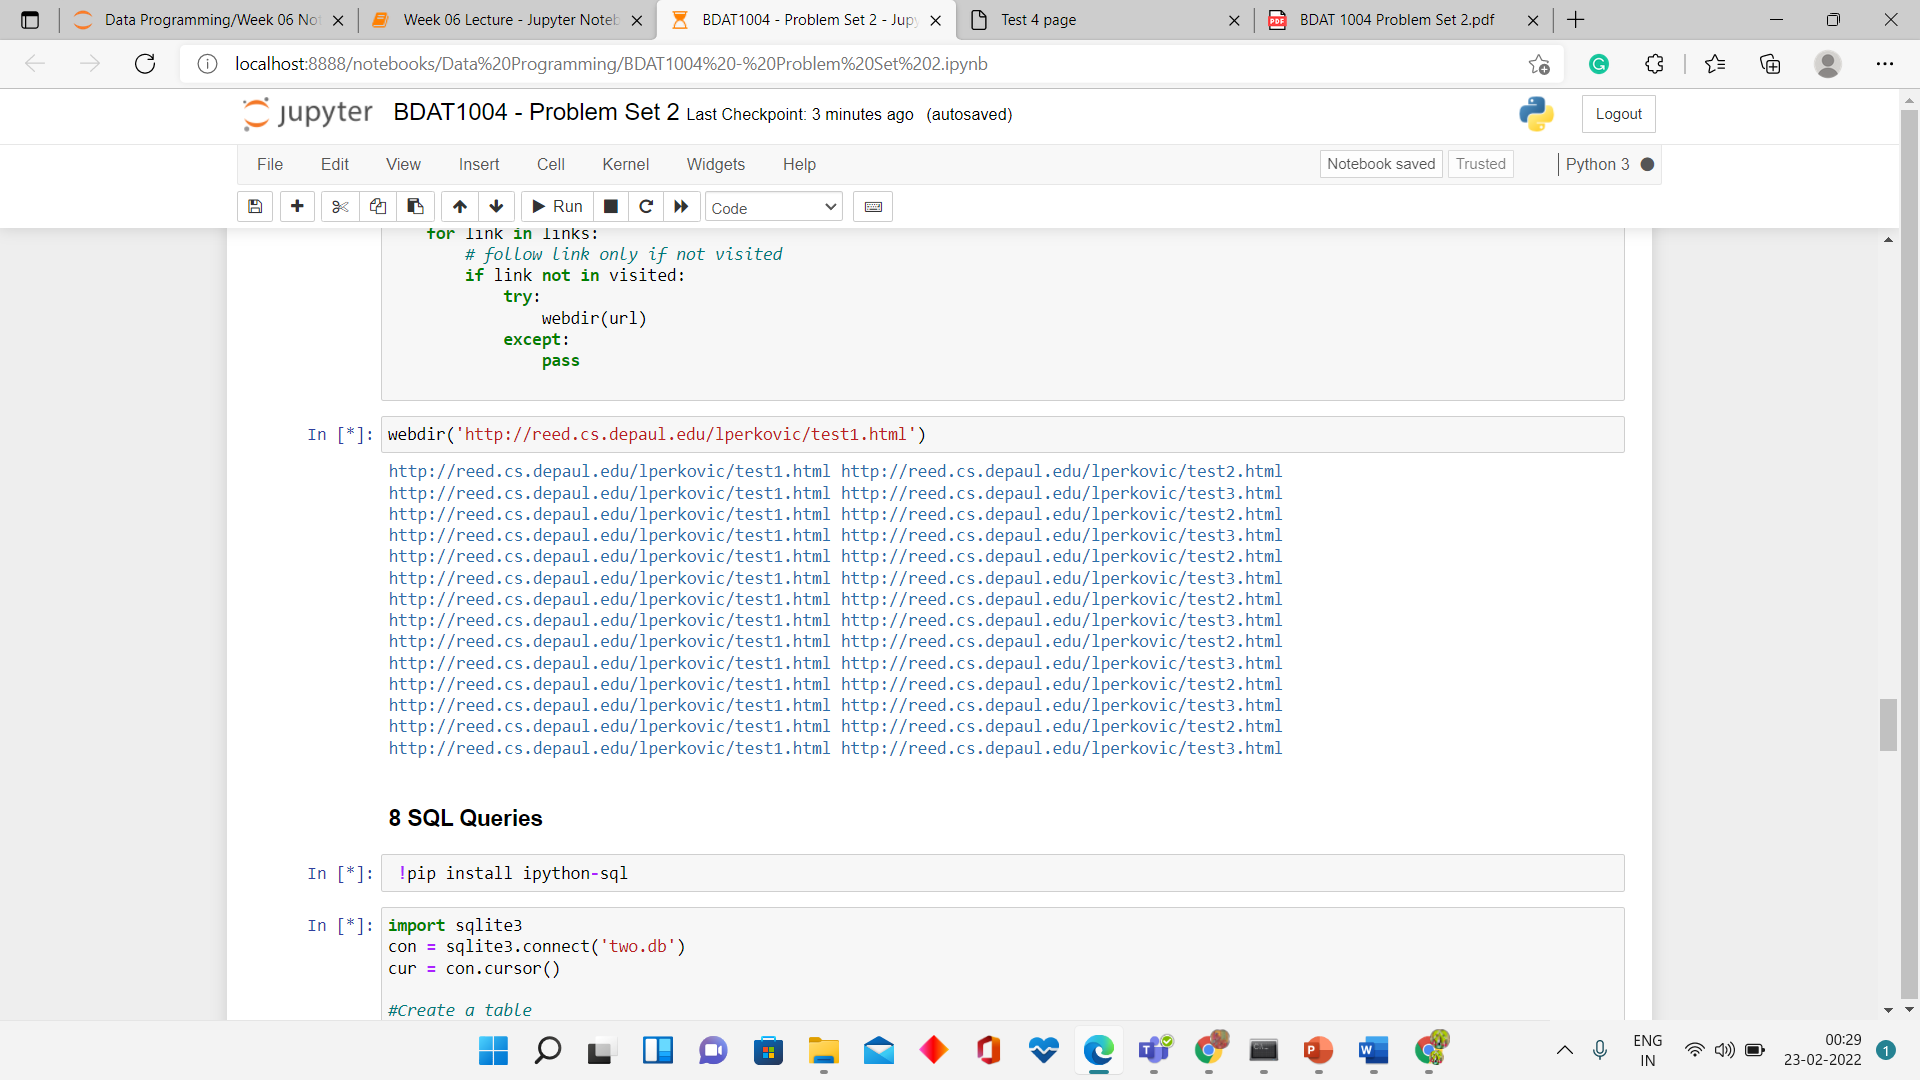

### 8 SQL Queries

In [ ]:
 !pip install ipython-sql

In [18]:
import sqlite3
con = sqlite3.connect('two.db')
cur = con.cursor()

#Create a table
cur.execute("CREATE TABLE Weather (City text, Country text, Season text, Temperature_C float, Rainfall_MM float)")

#Inserting Values into table
cur.execute("INSERT INTO Weather VALUES ('Mumbai', 'India', 'Winter', 24.8, 5.9)")
cur.execute("INSERT INTO Weather VALUES ('Mumbai', 'India', 'Spring', 28.4 , 16.2)")
cur.execute("INSERT INTO Weather VALUES ('Mumbai', 'India', 'Summer', 27.9, 1549.4)")
cur.execute("INSERT INTO Weather VALUES ('Mumbai', 'India', 'Fall', 27.6 , 346.0)")
cur.execute("INSERT INTO Weather VALUES ('London', 'United Kingdom', 'Winter', 4.2 , 207.7)")
cur.execute("INSERT INTO Weather VALUES ('London', 'United Kingdom', 'Spring', 8.3, 169.6)")
cur.execute("INSERT INTO Weather VALUES ('London', 'United Kingdom', 'Summer', 15.7, 157.0)")
cur.execute("INSERT INTO Weather VALUES ('London', 'United Kingdom', 'Fall', 10.4, 218.5)")
cur.execute("INSERT INTO Weather VALUES ('Cairo', 'Egypt', 'Winter', 13.6, 16.5)")
cur.execute("INSERT INTO Weather VALUES ('Cairo', 'Egypt', 'Spring', 20.7, 6.5)")
cur.execute("INSERT INTO Weather VALUES ('Cairo', 'Egypt', 'Summer', 27.7, 0.1)")
cur.execute("INSERT INTO Weather VALUES ('Cairo', 'Egypt', 'Fall', 22.2, 4.5)")


OperationalError: table Weather already exists

In [19]:
cur.execute('SELECT * FROM Weather')
for record in cur:
    print(record)

('Mumbai', 'India', 'Winter', 24.8, 5.9)
('Mumbai', 'India', 'Spring', 28.4, 16.2)
('Mumbai', 'India', 'Summer', 27.9, 1549.4)
('Mumbai', 'India', 'Fall', 27.6, 346.0)
('London', 'United Kingdom', 'Winter', 4.2, 207.7)
('London', 'United Kingdom', 'Spring', 8.3, 169.6)
('London', 'United Kingdom', 'Summer', 15.7, 157.0)
('London', 'United Kingdom', 'Fall', 10.4, 218.5)
('Cairo', 'Egypt', 'Winter', 13.6, 16.5)
('Cairo', 'Egypt', 'Spring', 20.7, 6.5)
('Cairo', 'Egypt', 'Summer', 27.7, 0.1)
('Cairo', 'Egypt', 'Fall', 22.2, 4.5)


### 8a All the temperature data.


In [20]:
cur.execute('SELECT Temperature_C FROM Weather')

for record in cur:
    print(record)
    

(24.8,)
(28.4,)
(27.9,)
(27.6,)
(4.2,)
(8.3,)
(15.7,)
(10.4,)
(13.6,)
(20.7,)
(27.7,)
(22.2,)


### 8b All the cities, but without repetition.

In [21]:
cur.execute('SELECT Distinct(City) from Weather')

for record in cur:
    print(record)

('Mumbai',)
('London',)
('Cairo',)


### 8c All the records for India

In [22]:
con = sqlite3.connect('two.db')
cur = con.cursor()
cur.execute('SELECT Distinct City from Weather')

for record in cur:
    print(record)

('Mumbai',)
('London',)
('Cairo',)


### 8d All the Fall records

In [23]:
con = sqlite3.connect('two.db')
cur = con.cursor()
cur.execute('SELECT * from Weather where Season = "Fall"')
for record in cur:
    print(record)
    

('Mumbai', 'India', 'Fall', 27.6, 346.0)
('London', 'United Kingdom', 'Fall', 10.4, 218.5)
('Cairo', 'Egypt', 'Fall', 22.2, 4.5)


### 8e The city, country, and season for which the average rainfall is between 200 and 400 millimeters.


In [24]:
con = sqlite3.connect('two.db')
cur = con.cursor()

cur.execute('SELECT City, Country, Season from Weather where Rainfall_MM Between 200 and 400')

for record in cur:
    print(record)
    

('Mumbai', 'India', 'Fall')
('London', 'United Kingdom', 'Winter')
('London', 'United Kingdom', 'Fall')


### 8f The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.

In [25]:
con = sqlite3.connect('two.db')
cur = con.cursor()

cur.execute('SELECT City, Country, Temperature_C from Weather where Temperature_C>20 order by Temperature_C ASC')

for record in cur:
    print(record)

('Cairo', 'Egypt', 20.7)
('Cairo', 'Egypt', 22.2)
('Mumbai', 'India', 24.8)
('Mumbai', 'India', 27.6)
('Cairo', 'Egypt', 27.7)
('Mumbai', 'India', 27.9)
('Mumbai', 'India', 28.4)


### 8g The total annual rainfall for Cairo.

In [26]:
con = sqlite3.connect('two.db')
cur = con.cursor()

cur.execute('SELECT SUM(Rainfall_MM) from Weather where City = "Cairo"')

for record in cur:
    print(record)
    

(27.6,)


### 8f The total rainfall for each season.

In [27]:
con = sqlite3.connect('two.db')
cur = con.cursor()

cur.execute('SELECT Season, SUM(Rainfall_MM) from Weather group by Season')

for record in cur:
    print(record)

('Fall', 569.0)
('Spring', 192.29999999999998)
('Summer', 1706.5)
('Winter', 230.1)


### Question 9

In [28]:
words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

### 9a

In [29]:
print(words)

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


### 9b  Printing the words in list in lower case

In [30]:
for i in range(len(words)):
    words[i] = words[i].lower()
print(words)

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


### 9c the list of lengths of words in list words

In [31]:
freq = []

for i in words:
    freq.append(len(i))
    
print(freq)

[3, 5, 5, 3, 5, 4, 3, 4, 3]


### 9d the list containing a list for every word of list words, where each list contains the word in uppercase and lowercase and the length of the word.

In [32]:
lst = []

for i in words:
    
    upper = i.upper()
    lower = i.lower()
    nested = [upper,lower,len(i)]
    lst.append(nested)
    
print(lst)

[['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]]


### 9e he list of words in list words containing 4 or more characters.

In [33]:
lst = []

for i in words:
    if len(i)>=4:
        lst.append(i)
        
print(lst)

['quick', 'brown', 'jumps', 'over', 'lazy']
